<a href="https://colab.research.google.com/github/zbrubaker/portfolio/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intro

Zachary Brubaker

CS-4430

Project 3 -- Train a Neural Net to Classify Handwritten Characters

You can access this notebook at: https://github.com/zbrubaker/portfolio/blob/main/Project3.ipynb

#Train the Model for Classification


First, import all necessary libraries.

In [1]:
#support for large, multi-dimensional arrays and matrices 
#and a large collection of high-level mathematical functions  
#to operate on these arrays 
#NOTE: most functionality found in Matlab is in numpy too 
import numpy as np 
 
#PyTorch - Open Source machine learning library 
import torch  
 
# package consists of popular datasets, model architectures, and common image transformations for computer vision. 
import torchvision  
 
#Plotting tools that implement Matlab-like operations 
import matplotlib.pyplot as plt  
 
from torchvision import datasets, transforms #image datasets and  common image transformations. 
from torch import nn, optim #basic building block for graphs, and  package implementing various optimization algorithms. 

#Import for downloading images from Google Drive
!pip install --upgrade --no-cache-dir gdown

import gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Import the MNIST Dataset

In [2]:
#transform to prep dataset for input into NN 
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

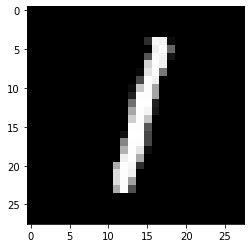

In [3]:
training_set = datasets.MNIST('-/.pytorch/MNIST_data/', download=True, train=True, transform=transform) 
trainloader = torch.utils.data.DataLoader(training_set, batch_size=64, shuffle=True)

#create an iterator for the dataset 
dataiter = iter(trainloader) 
images, labels = next(dataiter)

plt.imshow(images[0].numpy().squeeze(), cmap= "Greys_r")

##Train the Model

Use the images from the MNIST dataset to train the model.

In [4]:
# 784 inputs, 128  hiddenl (ReLU), 64 hidden2 (ReLU), 10 output (Softmax) 
input_size = 784 
hidden_sizes = [128, 64] 
output_size = 10 
 
#a feed-forward network using a sequential container 
# (Modules will be added to it in the order they are passed in the constructor) 
model= nn.Sequential(nn.Linear(input_size, hidden_sizes[0]), nn.ReLU(), nn.Linear(hidden_sizes[0], hidden_sizes
[1]),nn.Linear(hidden_sizes[1], output_size), nn.Softmax(dim=1)) 
 
dataiter = iter(trainloader) 
images, labels = next(dataiter) 
 
images.resize_(images.shape[0], 1, 784) 
ps = model.forward(images[0, :]) 
 
#define loss function 
criterion = nn.NLLLoss() 
 
#iterate over the data 
dataiter = iter(trainloader) 
images, labels = next(dataiter) 
 
#reshape data 
images = images.view(images.shape[0], -1) 
 
#Feed forward 
logps = model(images) 
loss = criterion(logps, labels)

In [5]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) 
 
#how many training epochs 
epochs = 25
for e in range(epochs): 
    running_loss = 0 
    for images, labels in trainloader: 
         
        images = images.view(images.shape[0], -1) 
         
        optimizer.zero_grad() 
        output = model(images) 
        loss = criterion(output, labels) 
         
        #Backpropagation 
        loss.backward() 
        optimizer.step() 
        running_loss += loss.item() 
     
    else: 
        print(e, running_loss/len(trainloader)) 

0 -0.17182937158799882
1 -0.3780815507938613
2 -0.6022000766829896
3 -0.6995803484403248
4 -0.7242710289162105
5 -0.7382662155862048
6 -0.8163035126891471
7 -0.8541649510102994
8 -0.8694298584451045
9 -0.8785390308670906
10 -0.8847002692059922
11 -0.8895492922903886
12 -0.8934943621982135
13 -0.8965352026384268
14 -0.8993974378876595
15 -0.901620536597807
16 -0.9039254015061393
17 -0.9056346903223473
18 -0.907316773557968
19 -0.9091032329779952
20 -0.9104300500360379
21 -0.911971073033713
22 -0.913146394148056
23 -0.9145184300982876
24 -0.9155322489962141


##Calculate the Model Accuracy

In [6]:
#generate measure for model accuracy 
correct = 0 
all_counted = 0 
 
for images,labels in trainloader: 
  for i in range(len(labels)): 
    img = images[i].view(1, 784) 
    with torch.no_grad(): 
        logps = model(img) 
    ps = torch.exp(logps) 
     
    probability = list(ps.numpy()[0]) 
     
    pred_label = probability.index(max(probability)) 
    true_label = labels.numpy()[i] 
    if(true_label == pred_label): 
      correct += 1 
    all_counted += 1 
 
print("Model Accuracy =", (correct/all_counted))

Model Accuracy = 0.9254166666666667


Therefore, the Neural Network classification classifies images in the MNIST dataset with 92.5% accuracy.

#Test 1: The Model with Handwritten Images

I will now import handwritten images and test the accuracy of the model in classifying these images. First, I will download these images from my Google Drive. Then, I will convert them into the appropriate data type to be run through the model.

##Import Handwritten Images

In [7]:
url = "https://drive.google.com/drive/folders/1Mx1d70tj8Cc6WSIuO2dl0mi_hsu37zE4?usp=share_link"
gdown.download_folder(url, quiet=True, use_cookies=False)

['/content/Numbers/0image.png',
 '/content/Numbers/1image.png',
 '/content/Numbers/2image.png',
 '/content/Numbers/3image.png',
 '/content/Numbers/4image.png',
 '/content/Numbers/5image.png',
 '/content/Numbers/6image.png',
 '/content/Numbers/7image.png',
 '/content/Numbers/8image.png',
 '/content/Numbers/9image.png']

[8, 0, 3, 4, 5, 7, 9, 6, 2, 1]

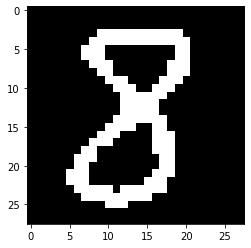

In [17]:
from torch.utils.data import TensorDataset, DataLoader
# import required module
import os
# assign directory
directory = './Numbers/'
from PIL import Image

files = []
targets = []

# iterate over files in the directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    targets.append(int(filename[0]))
    files.append(f)

images = []

for f in files:
  img = Image.open(f)
  img = img.convert('L')
  img_array = np.asarray(img)
  bw = (img_array > img_array.mean() - 1) * 255
  bw = 255 - bw
  images.append(bw)

#Transform the images to a Tensor
x = torch.Tensor(images) 
y = torch.Tensor(targets)
y = y.long()

dataset = TensorDataset(x,y)
importedData = DataLoader(dataset, batch_size=10, shuffle=True)

plt.imshow(images[0].reshape((28, 28)), cmap=plt.cm.gray)
targets

##Calculate the Model Accuracy for Classifying These Images

Predicted: 7 Actual: 7
Predicted: 0 Actual: 0
Predicted: 8 Actual: 2
Predicted: 3 Actual: 8
Predicted: 6 Actual: 6
Predicted: 1 Actual: 1
Predicted: 8 Actual: 9
Predicted: 8 Actual: 5
Predicted: 3 Actual: 3
Predicted: 8 Actual: 4
Model Accuracy = 0.5


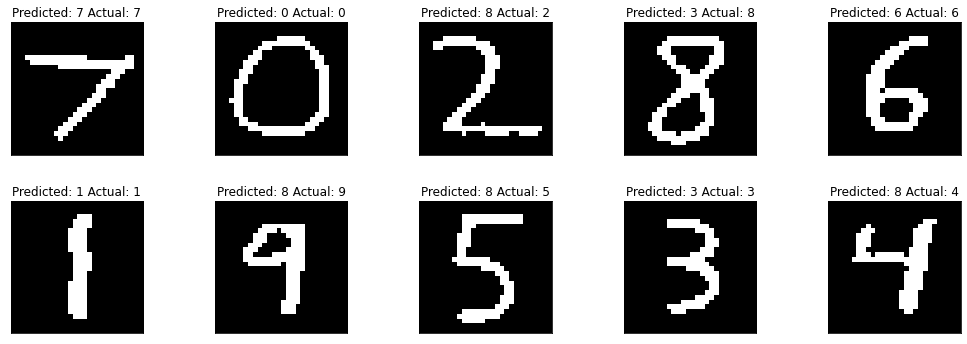

In [18]:
#generate measure for model accuracy 
correct = 0 
all_counted = 0 

#Make Subplots
plt.figure(figsize=(2.8 * 5, 2.4 * 2))
plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)

#Use the importedData to test accuracy
for images,labels in importedData: 
  for i in range(len(labels)): 
    img = images[i].view(1, 784) 
    with torch.no_grad(): 
        logps = model(img) 
    ps = torch.exp(logps) 
     
    probability = list(ps.numpy()[0]) 
     
    pred_label = probability.index(max(probability)) 
    true_label = labels.numpy()[i]
    
    #Graph the Predictions
    plt.subplot(2, 5, i + 1)
    plt.title("Predicted: {a} Actual: {b}".format(a=pred_label,b=true_label))
    plt.imshow(images[i].reshape((28, 28)), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

    #Print the predictions
    print("Predicted: {a} Actual: {b}".format(a=pred_label,b=true_label))
    
    if(true_label == pred_label): 
      correct += 1 
    all_counted += 1 
 
print("Model Accuracy =", (correct/all_counted))

It can be seen that the model trained on the MNIST dataset accurately classifies 50-70% of the imported images. (previously, a score of 70 was achieved).

#Test 2: The Model Against Rotated Data

I will now test how well the classification algorithm works on rotated images.

##Rotate the Imported Images

Rotate the images 90 degrees.

tensor([8, 0, 3, 4, 5, 7, 9, 6, 2, 1])

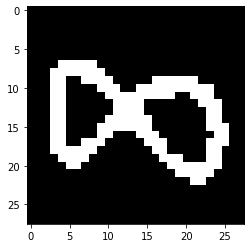

In [10]:
images = []
for f in files:
  col = Image.open(f)
  col = col.rotate(90) #Rotate the images 
  gry = col.convert('L')
  grarray = np.asarray(gry)
  bw = (grarray > grarray.mean() - 1) * 255
  bw = 255 - bw
  # images.append(torch.from_numpy(bw).unsqueeze(0).float())
  images.append(bw)
#Make an arry of torches that stack on each other.
# images = torch.stack(images, dim=0)

tensor_x = torch.Tensor(images) # transform to torch tensor
tensor_y = torch.Tensor(y)
tensor_y = tensor_y.long()

my_dataset = TensorDataset(tensor_x,tensor_y) # create your datset
importedData = DataLoader(my_dataset, batch_size=10, shuffle=True)

plt.imshow(images[0].reshape((28, 28)), cmap=plt.cm.gray)
y

##Find the Model Accuracy for Rotated Images.

Predicted: 4 Actual: 2
Predicted: 8 Actual: 5
Predicted: 8 Actual: 9
Predicted: 8 Actual: 8
Predicted: 0 Actual: 0
Predicted: 0 Actual: 7
Predicted: 0 Actual: 4
Predicted: 8 Actual: 3
Predicted: 6 Actual: 6
Predicted: 4 Actual: 1
Model Accuracy = 0.3


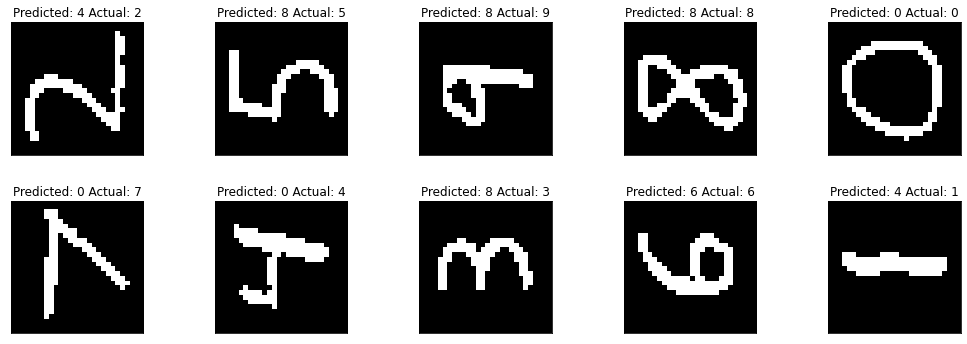

In [11]:
#generate measure for model accuracy 
correct = 0 
all_counted = 0 

#Make Subplots
plt.figure(figsize=(2.8 * 5, 2.4 * 2))
plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)

#Use the importedData to test accuracy
for images,labels in importedData: 
  for i in range(len(labels)): 
    img = images[i].view(1, 784) 
    with torch.no_grad(): 
        logps = model(img) 
    ps = torch.exp(logps) 
     
    probability = list(ps.numpy()[0]) 
     
    pred_label = probability.index(max(probability)) 
    true_label = labels.numpy()[i]
    
    #Graph the Predictions
    plt.subplot(2, 5, i + 1)
    plt.title("Predicted: {a} Actual: {b}".format(a=pred_label,b=true_label))
    plt.imshow(images[i].reshape((28, 28)), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

    #Print the predictions
    print("Predicted: {a} Actual: {b}".format(a=pred_label,b=true_label))
    
    if(true_label == pred_label): 
      correct += 1 
    all_counted += 1 
 
print("Model Accuracy =", (correct/all_counted))

It can be seen that the classification trained on the MNIST dataset correctly classifies 30% of the images correctly. It only correctly classifies the 0, 8, and 6. (Previous versions had been worse, this is the best one that I have seen).

#Test 3: The Model Against Scaled and Translated Data



I will now scale the images down and move them to the lower right corner. Then, we will see if the classification algorithm works on them. 

The following code is a function that scales the image by the ```zoom_factor```

In [12]:
import numpy as np
from scipy.ndimage import zoom


def clipped_zoom(img, zoom_factor, **kwargs):

    h, w = img.shape[:2]

    # For multichannel images we don't want to apply the zoom factor to the RGB
    # dimension, so instead we create a tuple of zoom factors, one per array
    # dimension, with 1's for any trailing dimensions after the width and height.
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)

    # Zooming out
    if zoom_factor < 1:

        # Bounding box of the zoomed-out image within the output array
        zh = int(np.round(h * zoom_factor))
        zw = int(np.round(w * zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        # Zero-padding
        out = np.zeros_like(img)
        out[top:top+zh, left:left+zw] = zoom(img, zoom_tuple, **kwargs)

    # Zooming in
    elif zoom_factor > 1:

        # Bounding box of the zoomed-in region within the input array
        zh = int(np.round(h / zoom_factor))
        zw = int(np.round(w / zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        out = zoom(img[top:top+zh, left:left+zw], zoom_tuple, **kwargs)

        # `out` might still be slightly larger than `img` due to rounding, so
        # trim off any extra pixels at the edges
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top+h, trim_left:trim_left+w]

    # If zoom_factor == 1, just return the input array
    else:
        out = img
    return out

Now, scale and transform the images to put the number in the bottom right corner.

tensor([8, 0, 3, 4, 5, 7, 9, 6, 2, 1])

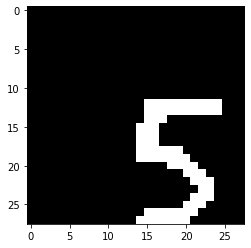

In [13]:
images = []
tx, ty = 6, 5  # translation on x and y axis, in pixels
for f in files:
  col = Image.open(f)
  gry = col.convert('L')
  grarray = np.asarray(gry)
  bw = (grarray > grarray.mean() - 1) * 255
  bw = 255 - bw
  bw = clipped_zoom(bw, 0.7) #Scale the Image
  bw = (bw < bw.mean() - 1) * 255
  bw = 255 - bw
  N, M = bw.shape
  
  #Translate the Image
  image_translated = np.zeros_like(bw)
  image_translated[max(tx,0):M+min(tx,0), max(ty,0):N+min(ty,0)] = bw[-min(tx,0):M-max(tx,0), -min(ty,0):N-max(ty,0)] 

  images.append(image_translated)


tensor_x = torch.Tensor(images) # transform to torch tensor
tensor_y = torch.Tensor(y)
tensor_y = tensor_y.long()

my_dataset = TensorDataset(tensor_x,tensor_y) # create your datset
importedData = DataLoader(my_dataset, batch_size=10, shuffle=True)

plt.imshow(images[4].reshape((28, 28)), cmap=plt.cm.gray)
y

Predicted: 3 Actual: 8
Predicted: 6 Actual: 0
Predicted: 4 Actual: 5
Predicted: 3 Actual: 2
Predicted: 2 Actual: 9
Predicted: 2 Actual: 4
Predicted: 2 Actual: 6
Predicted: 2 Actual: 7
Predicted: 3 Actual: 1
Predicted: 3 Actual: 3
Model Accuracy = 0.1


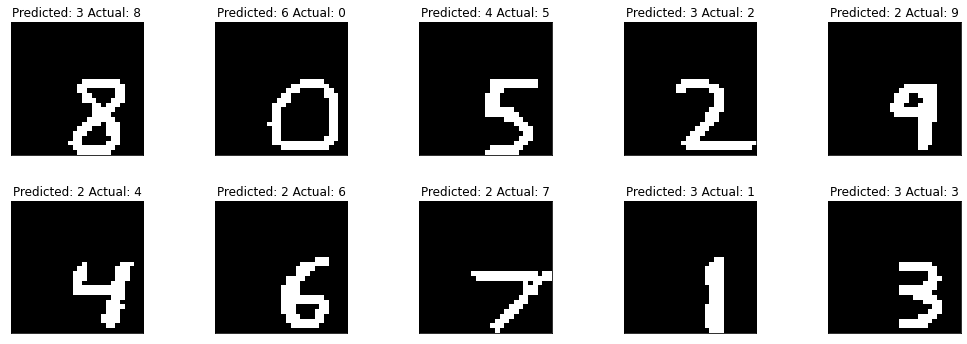

In [14]:
#generate measure for model accuracy 
correct = 0 
all_counted = 0 

#Make Subplots
plt.figure(figsize=(2.8 * 5, 2.4 * 2))
plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)

#Use the importedData to test accuracy
for images,labels in importedData: 
  for i in range(len(labels)): 
    img = images[i].view(1, 784) 
    with torch.no_grad(): 
        logps = model(img) 
    ps = torch.exp(logps) 
     
    probability = list(ps.numpy()[0]) 
     
    pred_label = probability.index(max(probability)) 
    true_label = labels.numpy()[i]
    
    #Graph the Predictions
    plt.subplot(2, 5, i + 1)
    plt.title("Predicted: {a} Actual: {b}".format(a=pred_label,b=true_label))
    plt.imshow(images[i].reshape((28, 28)), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

    #Print the predictions
    print("Predicted: {a} Actual: {b}".format(a=pred_label,b=true_label))
    
    if(true_label == pred_label): 
      correct += 1 
    all_counted += 1 
 
print("Model Accuracy =", (correct/all_counted))

When the scaled images are run through the classifier, the 3 is classified correctly, however all other images are not classified correctly. Therefore, the accuracy of the model on this data is 10%.

#Summary

In this project, we used a neural net with stochastic gradient descent and backpropogation to create a classification model which would work to classify an image as a number. This model was trained using the MNIST dataset. Then, the model was tested to see how well it classified different test datasets.

First, the classifier was run on the MNIST dataset itself. It classified images in this dataset with 92.5% Accuracy.

Next, the classifier was run on a group of ten handwritten digits. The model classified these digits well with an accuracy of around 50%. In my testing, I got values as high as 70%

Then, the classifier was run on a group of ten handwritten digits that were rotated 90 degrees. The classifier struggled with these. The classifier got only 30% of these images correct. This was the highest that the classifier had ever gotten. Previously, the classifier never had higher than 10% accuracy on rotated data.

Finally, the classifier was run on a group of handwritten digits that were scaled down and translated to the right bottom corner of the image. Here, the classifier only correctly classified the three correctly for 10% accuracy.